# Collecte des données : Prix du carburant

Le prix du carburant en région parisienne a pu avoir un effet non négligeable, surtout en 2022, sur le trafic à Paris. Les données récupérées proviennent du site officiel du gouvernement, à savoir : [https://www.prix-carburants.gouv.fr/rubrique/opendata/](https://www.prix-carburants.gouv.fr/rubrique/opendata/).

Ce notebook vise à extraire de ces données le prix moyen du carburant en région parisienne (départements 75, 92, 93 et 94) pour chaque jour entre le 1er novembre 2021 et le 9 décembre 2022.

## Import des modules nécessaires

In [ ]:
import numpy as np
import pandas as pd
import xml.etree.ElementTree as Xet

## Extraction des données du XML

#### 2022

In [138]:
# On extrait les données pertinentes du fichier XML de 2022

cols = ['id_station', 'code_postal', 'carburant', 'date_heure', 'prix']

xmlparse = Xet.parse('PrixCarburants_annuel_2022.xml')
root = xmlparse.getroot()

id_station_list = []
cp_list = []

carburant_list = []
date_heure_list = []
prix_list = []
    
for pdv in root.iter('pdv'):
    id_station = pdv.attrib.get('id')
    cp = pdv.attrib.get('cp')
    
    id_station_list.append(id_station)
    cp_list.append(cp)

for pr in root.iter('prix'):
    carburant = pr.attrib.get('nom')
    date_heure = pr.attrib.get('maj')
    prix = pr.attrib.get('valeur')
    
    carburant_list.append(carburant)
    date_heure_list.append(date_heure)
    prix_list.append(prix)
    
all_items = [[id_station, cp, carburant, date_heure, prix] for id_station, cp, carburant, date_heure, prix in 
              zip(id_station_list, cp_list, carburant_list, date_heure_list, prix_list)]
    
df_22 = pd.DataFrame(all_items, columns=cols)

In [205]:
# On garde uniquement les données concernant les départements 75, 92, 93 et 94
df_22 = df_22[df_22['code_postal'].apply(lambda row: row[:2]).str.contains('75|92|93|94')]

# On transforme la colonne 'date_heure' en format datetime
df_22['date_heure'] = pd.to_datetime(df_22['date_heure'], format='%Y-%m-%d %H:%M:%S')

# On convertit la colonne des prix en float et on corrige le prix
df_22['prix'] = df_22['prix'].astype(float)

# On drop la colonne 'code_postal'
df_22 = df_22.drop('code_postal', axis=1)

In [142]:
# On extrait les données pertinentes du fichier XML de 2021

cols = ['id_station', 'code_postal', 'carburant', 'date_heure', 'prix']

xmlparse = Xet.parse('PrixCarburants_annuel_2021.xml')
root = xmlparse.getroot()

id_station_list = []
cp_list = []

carburant_list = []
date_heure_list = []
prix_list = []
    
for pdv in root.iter('pdv'):
    id_station = pdv.attrib.get('id')
    cp = pdv.attrib.get('cp')
    
    id_station_list.append(id_station)
    cp_list.append(cp)

for pr in root.iter('prix'):
    carburant = pr.attrib.get('nom')
    date_heure = pr.attrib.get('maj')
    prix = pr.attrib.get('valeur')
    
    carburant_list.append(carburant)
    date_heure_list.append(date_heure)
    prix_list.append(prix)
    
all_items = [[id_station, cp, carburant, date_heure, prix] for id_station, cp, carburant, date_heure, prix in 
              zip(id_station_list, cp_list, carburant_list, date_heure_list, prix_list)]
    
df_21 = pd.DataFrame(all_items, columns=cols)

In [147]:
# On conserve uniquement les données à partir du 1er novembre 2021
df_21['date_heure'] = pd.to_datetime(df_21['date_heure'], format='%Y-%m-%d %H:%M:%S')
df_21 = df_21[df_21['date_heure'] >= '2021-11-01 00:00:00']

# On transforme la colonne 'date_heure' en format datetime
df_21['date_heure'] = pd.to_datetime(df_21['date_heure'], format='%Y-%m-%d %H:%M:%S')

# On convertit la colonne des prix en float et on corrige le prix
df_21['prix'] = df_21['prix'].astype(float)/1000

# On garde uniquement les données concernant les départements 75, 92, 93 et 94
df_21 = df_21[df_21['code_postal'].apply(lambda row: row[:2]).str.contains('75|92|93|94')]

# On drop la colonne 'code_postal'
df_21 = df_21.drop('code_postal', axis=1)

In [206]:
# On concatène les deux DataFrames pour avoir les données sur toute la durée considérée
df = pd.concat([df_21, df_22])

/Users/Paul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [207]:
# On crée une colonne 'date'
df['date'] = df['date_heure'].astype(str).apply(lambda row: row[:10])
df = df[df['date'].notna()]

df = df.drop(['id_station', 'code_postal', 'carburant', 'date_heure'], axis=1)

In [211]:
# On calcule le prix moyen du carburant pour chaque jour
df_ = df.groupby('date').mean()[['prix']]
df_ = df_.reset_index()

df_

,date,prix
0,2021-11-01,1.540000
1,2021-11-02,1.526977
2,2021-11-03,1.585551
3,2021-11-04,1.491269
4,2021-11-05,1.540098
5,2021-11-06,1.527435
6,2021-11-07,1.502318
7,2021-11-08,1.558340
8,2021-11-09,1.498094
9,2021-11-10,1.551000


## Quick visualization

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 9 Text xticklabel objects>)

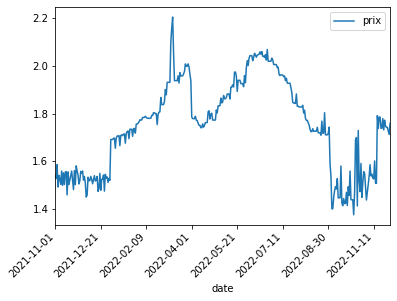

In [215]:
import matplotlib.pyplot as plt

df_.plot(x='date', y='prix')
plt.xticks(rotation=45, ha="right")

## Ajout des données à la base de données principale

In [ ]:
# TODO